# AllanDeviation Method By Wrona

> Source: https://mwrona.com/posts/gyro-noise-analysis/

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
stat_acc_df = pd.read_csv("../data/stationary_acc.csv")
stat_gyr_df = pd.read_csv("../data/stationary_gyr.csv")
traj_acc_df = pd.read_csv("../data/traj_acc.csv")
traj_gyr_df = pd.read_csv("../data/traj_gyr.csv")
traj_gps_df = pd.read_csv("../data/traj_gps.csv")
traj_truth_df = pd.read_csv("../data/traj_truth.csv")

In [4]:
def AllanDeviation(dataArr: np.ndarray, fs: float, maxNumM: int=100):
    """Compute the Allan deviation (sigma) of time-series data.

    Algorithm obtained from Mathworks:
    https://www.mathworks.com/help/fusion/ug/inertial-sensor-noise-analysis-using-allan-variance.html

    Args
    ----
        dataArr: 1D data array
        fs: Data sample frequency in Hz
        maxNumM: Number of output points
    
    Returns
    -------
        (taus, allanDev): Tuple of results
        taus (numpy.ndarray): Array of tau values
        allanDev (numpy.ndarray): Array of computed Allan deviations
    """
    ts = 1.0 / fs
    N = len(dataArr)
    Mmax = 2**np.floor(np.log2(N / 2))
    M = np.logspace(np.log10(1), np.log10(Mmax), num=maxNumM)
    M = np.ceil(M)  # Round up to integer
    M = np.unique(M)  # Remove duplicates
    taus = M * ts  # Compute 'cluster durations' tau

    # Compute Allan variance
    allanVar = np.zeros(len(M))
    for i, mi in enumerate(M):
        twoMi = int(2 * mi)
        mi = int(mi)
        allanVar[i] = np.sum(
            (dataArr[twoMi:N] - (2.0 * dataArr[mi:N-mi]) + dataArr[0:N-twoMi])**2
        )
    
    allanVar /= (2.0 * taus**2) * (N - (2.0 * M))
    return (taus, np.sqrt(allanVar))  # Return deviation (dev = sqrt(var))

In [66]:
def find_log_slope(ydat, xdat, i0=None, i1=None):
    assert len(ydat) == len(xdat)
    if i0 is None:
        i0 = len(ydat) // 2
    if i1 is None:
        i1 = len(ydat) - 1
    y1 = ydat[i1]
    y0 = ydat[i0]
    x1 = xdat[i1]
    x0 = xdat[i0]
    y1log = math.log10(y1)
    y0log = math.log10(y0)
    x1log = math.log10(x1)
    x0log = math.log10(x0)
    return (y1log - y0log) / (x1log - x0log)

In [54]:
def plotline(plt, alpha, taus, style):
    """ plot a line with the slope alpha """
    y = [pow(tt, alpha) for tt in taus]
    plt.loglog(taus, y, style)

## Accelerometer Analysis

In [5]:
accel_yaxis_vec = stat_acc_df.loc[:, 'Acceleration y (m/s^2)'].to_numpy()
accel_yaxis_vec = accel_yaxis_vec.reshape(accel_yaxis_vec.shape[0], 1)
accel_time_vec = stat_acc_df.loc[:, 'Time (s)'].to_numpy()
accel_time_vec = accel_time_vec.reshape(accel_time_vec.shape[0], 1)

In [6]:
accel_sampling_rate = float((accel_time_vec[1] - accel_time_vec[0])[0])
accel_sampling_freq = 1. / accel_sampling_rate
f"{accel_sampling_rate}s, {accel_sampling_freq}Hz" 

'0.05s, 20.0Hz'

In [63]:
(accel_taus, accel_adevs) = AllanDeviation(accel_yaxis_vec, accel_sampling_freq, maxNumM=200)
accel_taus.shape, accel_adevs.shape

((158,), (158,))

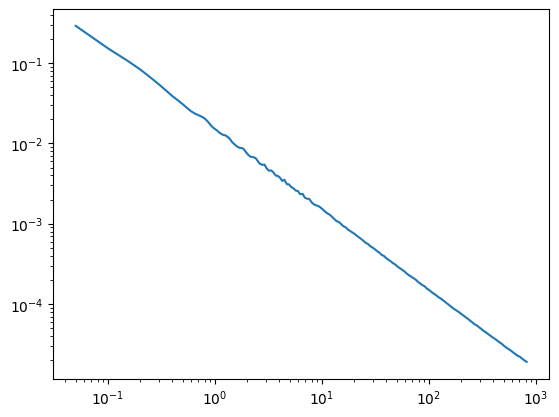

In [10]:
plt.loglog(accel_taus, accel_adevs)

In [ ]:
find_log_slope(accel_adevs, accel_taus)

-0.9871720022438183

In [15]:
vel_y = np.cumsum(accel_yaxis_vec) * accel_sampling_rate 
vel_y, vel_y.shape, accel_yaxis_vec.shape

(array([-6.04187735e-03, -1.11266255e-02, -1.64506558e-02, ...,
        -2.92518261e+02, -2.92526128e+02, -2.92543984e+02]),
 (50208,),
 (50208, 1))

In [70]:
(vely_taus, vely_adevs) = AllanDeviation(vel_y, accel_sampling_freq, maxNumM=200)
vely_taus, vely_adevs, vely_taus.shape, vely_adevs.shape

(array([5.0000e-02, 1.0000e-01, 1.5000e-01, 2.0000e-01, 2.5000e-01,
        3.0000e-01, 3.5000e-01, 4.0000e-01, 4.5000e-01, 5.0000e-01,
        5.5000e-01, 6.0000e-01, 6.5000e-01, 7.0000e-01, 7.5000e-01,
        8.0000e-01, 8.5000e-01, 9.0000e-01, 9.5000e-01, 1.0000e+00,
        1.0500e+00, 1.1000e+00, 1.1500e+00, 1.2000e+00, 1.2500e+00,
        1.3500e+00, 1.4000e+00, 1.4500e+00, 1.5500e+00, 1.6000e+00,
        1.7000e+00, 1.8000e+00, 1.8500e+00, 1.9500e+00, 2.0500e+00,
        2.1500e+00, 2.2500e+00, 2.4000e+00, 2.5000e+00, 2.6000e+00,
        2.7500e+00, 2.9000e+00, 3.0500e+00, 3.2000e+00, 3.3500e+00,
        3.5000e+00, 3.7000e+00, 3.8500e+00, 4.0500e+00, 4.2500e+00,
        4.4500e+00, 4.7000e+00, 4.9000e+00, 5.1500e+00, 5.4000e+00,
        5.7000e+00, 5.9500e+00, 6.2500e+00, 6.6000e+00, 6.9000e+00,
        7.2500e+00, 7.6000e+00, 8.0000e+00, 8.4000e+00, 8.8000e+00,
        9.2500e+00, 9.7000e+00, 1.0200e+01, 1.0700e+01, 1.1250e+01,
        1.1800e+01, 1.2400e+01, 1.3000e+01, 1.36

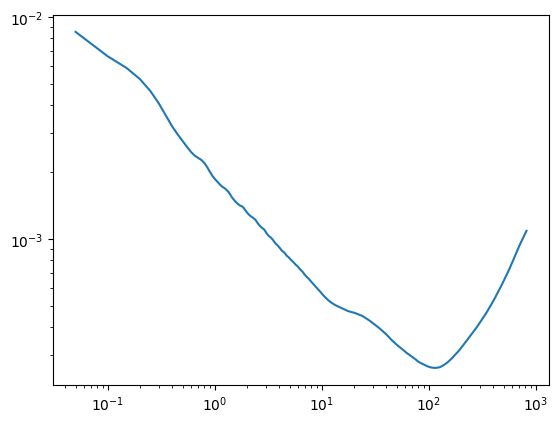

In [18]:
plt.loglog(vely_taus, vely_adevs)

In [ ]:
alpha = -0.5
y = alpha*taus

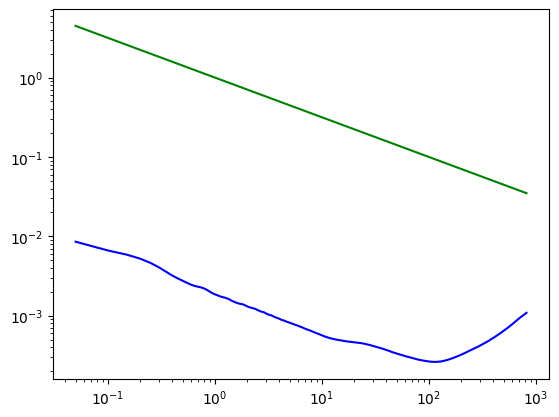

In [62]:
plt.loglog(vely_taus, vely_adevs, 'b')
plotline(plt, -0.5, vely_taus, "g")

In [72]:
find_log_slope(vely_adevs, vely_taus, 25, 50)

-0.5234914014196753